In [1]:
#Install rdkit python library
!pip install rdkit py3Dmol --quiet

In [8]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem

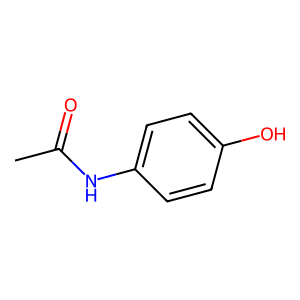

In [9]:
m = Chem.MolFromSmiles('CC(=O)NC1=CC=C(C=C1)O')
img = Draw.MolToImage(m)
img

In [14]:
#@title Use the following Viewer to load your SMILES as a 3D molecule, from Lab06 file
import py3Dmol
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

def MolTo3DView(mol, size=(300, 300), style="stick", surface=False, opacity=0.5):
    assert style in ('line', 'stick', 'sphere', 'carton')
    mblock = Chem.MolToMolBlock(mol)
    viewer = py3Dmol.view()
    viewer.addModel(mblock, 'mol')
    viewer.setStyle({style:{}})
    if surface:
        viewer.addSurface(py3Dmol.SAS, {'opacity': opacity})
    viewer.zoomTo()
    return viewer

from ipywidgets import interact,fixed,IntSlider
import ipywidgets

def smi2conf(smiles):
    '''Convert SMILES to rdkit.Mol with 3D coordinates'''
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        mol = Chem.AddHs(mol)
        AllChem.EmbedMolecule(mol)
        AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
        return mol
    else:
        return None

@interact
def smi2viewer(smi='CC(=O)NC1=CC=C(C=C1)O'):
    try:
        conf = smi2conf(smi)
        Chem.MolToPDBFile(conf, "../data/out.pdb")
        return MolTo3DView(conf).show()
    except:
        return None

interactive(children=(Text(value='CC(=O)NC1=CC=C(C=C1)O', description='smi'), Output()), _dom_classes=('widget…

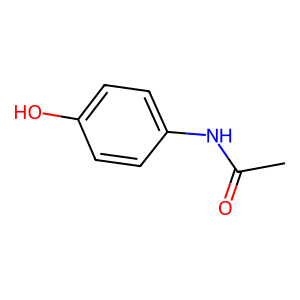

In [17]:
m = Chem.MolFromPDBFile('../data/out.pdb')
img2 = Draw.MolToImage(m)
img2